# Домашнее задание 3.5

### 1. Загрузка библиотек и генерация данных:

#### *Импорт библиотек*

In [427]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pandas.errors import SettingWithCopyWarning
from faker import Faker

import warnings

#### *Глобальные настройки*

In [428]:
warnings.filterwarnings("ignore", category=UserWarning)
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)

np.random.seed(42)

sns.set_theme(style="darkgrid")

fake = Faker('ru_RU')

#### *Генерация данных*
`data` - DataFrame с данными
   - `user` - пользователи, рандобно сгенерировал имена с помощью библиотеки faker (для красоты)
   - `means` - среднее пользователя
      - среднее=100
      - стандартное отклонение=15
      - размер выборки=1000
   - `success` = Успех/Не успех (0/1)

In [429]:
data = pd.DataFrame({
    'user': [fake.name() for _ in range(1000)],
    'means': np.random.normal(loc=100, scale=20, size=1000),
    'success': np.random.randint(0, 2, size=1000),
})

display(data.head(3))
display(data.tail(3))

,user,means,success
0,Воробьев Спиридон Давидович,109.934283,0
1,Василиса Николаевна Соловьева,97.234714,1
2,Тетерина Лидия Кузьминична,112.953771,0


,user,means,success
997,Волкова Алевтина Геннадиевна,112.816857,1
998,Нинель Макаровна Савельева,88.576420,0
999,Егорова Василиса Наумовна,111.451656,0


### 2. Расчет доверительного интервала для среднего значения:
- `mean_means` - Среднее значение выборки по колонке **means**
- `std_means` - Стандартное отклонение среднего значения
- `count_selection` - Размер выборки
- `error_mean` - Вычисление стандартной ошибки среднего
- `confidence_level` - Уровень доверия 95%
- `error_rate` - Величину допустимой погрешности 
- `lower_confidence_interval` - Нижняя границы доверительного интервала
- `upper_confidence_interval` - Верхняя границы доверительного интервала

In [430]:
mean_means = np.mean(data['means'])
std_means = np.std(data['means'], ddof=1)
count_selection = len(data['means'])
error_mean = std_means / np.sqrt(count_selection)
confidence_level = 0.95
error_rate = stats.norm.ppf((1 + confidence_level) / 2)

lower_interval_means = mean_means - error_rate * error_mean
upper_interval_means = mean_means + error_rate * error_mean
interval_mean = lower_interval_means, upper_interval_means

print(f'''
       Нижняя границы доверительного интервала для среднего значения: {lower_interval_means}
       Верхняя границы доверительного интервала для среднего значения: {upper_interval_means}
      ''')


       Нижняя границы доверительного интервала для среднего значения: 99.17281476837209
       Верхняя границы доверительного интервала для среднего значения: 101.60046746452093
      


### 3. Расчет доверительного интервала для доли
- `count_success` - Подсчет успешных результатов
- `assessment ` - Оценка вероятности успеха
- `count_selection` - Количества наблюдений
- `error_success` - Расчет стандартной ошибки для доли успеха
- `confidence_level` - Урокень доверия 95 %
- `error_rate` - Величину допустимой погрешности
- `lower_confidence_interval` - Нижняя границы доверительного интервала
- `upper_confidence_interval` - Верхняя границы доверительного интервала

In [431]:
count_success = np.sum(data['success'])
assessment  = count_success / len(data['success'])
count_selection = len(data['success'])
error_success = np.sqrt(assessment  * (1 - assessment ) / count_selection)
confidence_level = 0.95
error_rate = stats.norm.ppf((1 + confidence_level) / 2)

lower_interval_success = assessment  - error_rate * error_success
upper_interval_success = assessment  + error_rate * error_success
interval_success = lower_interval_success, upper_interval_success

print(f'''
       Нижняя границы доверительного интервала для доли: {lower_interval_success}
       Верхняя границы доверительного интервала для доли: {upper_interval_success}
      ''')


       Нижняя границы доверительного интервала для доли: 0.4800177488123244
       Верхняя границы доверительного интервала для доли: 0.5419822511876756
      


### 4. Визуализация результатов

*Визуализация доверительного интервала для среднего значения*

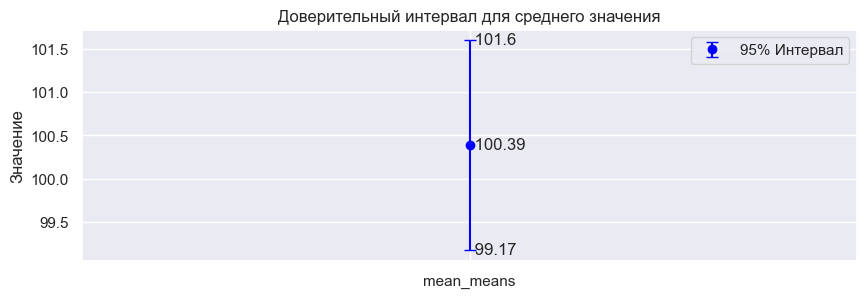

In [432]:
plt.figure(figsize=(10, 3))

plt.errorbar(x='mean_means',
             y=mean_means,
             yerr=[error_rate * error_mean],
             fmt='o',
             markersize=6,
             capsize=4,
             color='blue',
             label='95% Интервал')

plt.title('Доверительный интервал для среднего значения')
plt.ylabel('Значение')
plt.legend()

plt.text('mean_means', mean_means, f' {round(mean_means, 2)}', verticalalignment='center', horizontalalignment='left')
plt.text('mean_means', lower_interval_means, f' {round(lower_interval_means, 2)}', verticalalignment='center', horizontalalignment='left')
plt.text('mean_means', upper_interval_means, f' {round(upper_interval_means, 2)}', verticalalignment='center', horizontalalignment='left')

plt.show()

*Визуализация доверительного интервала для доли успеха*

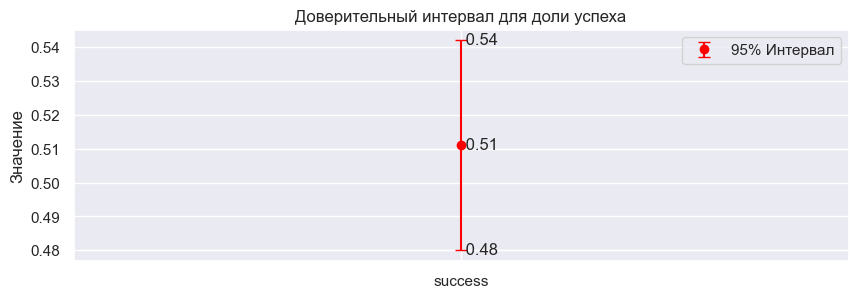

In [433]:
plt.figure(figsize=(10, 3))

plt.errorbar(x='success',
             y=assessment,
             yerr=[error_rate * error_success],
             fmt='o',
             markersize=6,
             capsize=4,
             color='red',
             label='95% Интервал')

plt.title('Доверительный интервал для доли успеха')
plt.ylabel('Значение')
plt.legend()

plt.text('success', assessment, f' {round(assessment, 2)}', verticalalignment='center', horizontalalignment='left')
plt.text('success', lower_interval_success, f' {round(lower_interval_success, 2)}', verticalalignment='center', horizontalalignment='left')
plt.text('success', upper_interval_success, f' {round(upper_interval_success, 2)}', verticalalignment='center', horizontalalignment='left')

plt.show()


### Вывод

In [434]:
print(f'''
       Среднее значение признака `means`: {round(mean_means, 2)}
       Доверительный интервал для среднего значения при {confidence_level*100}% уровне доверия: {interval_mean}
       --------------------------------------------------------------------------------------------------------
       Доля успеха: {assessment* 100}%
       Доверительный интервал для доли успеха при {confidence_level*100}% уровне доверия: {interval_success}
       ''')


       Среднее значение признака `means`: 100.39
       Доверительный интервал для среднего значения при 95.0% уровне доверия: (99.17281476837209, 101.60046746452093)
       --------------------------------------------------------------------------------------------------------
       Доля успеха: 51.1%
       Доверительный интервал для доли успеха при 95.0% уровне доверия: (0.4800177488123244, 0.5419822511876756)
       
